<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_TwitterAPI_CleanText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de texto

Si quiero reutilizar algunas funciones desarrolladas en la notebook anterior, podemos importarla desde el drive

In [2]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=9f37092512ee5aa6e0eef302e32c7468f8a9301bf2545073ffa543e67acccdec
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
%cd "/content/drive/My Drive/Colab Notebooks"
import import_ipynb

/content/drive/My Drive/Colab Notebooks


In [232]:
from DA_TwitterAPI_Scraping import connect_Twitter

In [225]:
filename="/content/drive/My Drive/_Credentials/credencials_API_twitter.json"
api=connect_Twitter(filename)

ibonetc estás conectado a la API de Twitter


In [7]:
import tweepy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np

Cargando datos del home de CaracolTV

In [351]:
text="@CaracolTV"
re.search(r'caracol', text.lower())!= None


True

In [ ]:
screen_name="CaracolTV"
df = pd.DataFrame(columns = ['tweet', 'user', 'user_followers', 'user_location', 'fav_count', 'rt_count', 'tweet_date', 'hashtags','mentions'])
i=0
for tweet in tweepy.Cursor(api.user_timeline, screen_name=screen_name, since = "2020-08-01", lang="es", tweet_mode='extended').items(3000):
  df.loc[i, 'tweet'] = tweet.full_text
  df.loc[i, 'user'] = tweet.user.name
  df.loc[i, 'user_followers'] = tweet.user.followers_count
  df.loc[i, 'user_location'] = tweet.user.location
  df.loc[i, 'fav_count'] = tweet.favorite_count
  df.loc[i, 'rt_count'] = tweet.retweet_count
  df.loc[i, 'tweet_date'] = tweet.created_at
  ## tomar los hashtag y los usuarios que se mencionan
  hashtag=None
  mentions=None
  if hasattr(tweet, "entities"):
    entities = tweet.entities
    if "hashtags" in entities:
      hashtag=[ent["text"] for ent in entities["hashtags"] if ent is not None and "text" in ent and ent["text"] is not None]
    if "user_mentions" in entities:
      mentions=[ent["screen_name"] for ent in entities["user_mentions"] if ent is not None and "screen_name" in ent and ent["screen_name"] is not None]  
  df.loc[i, 'hashtags']=hashtag
  df.loc[i, 'mentions']=mentions
  i+=1

Guardar a un csv

In [ ]:
path='/content/drive/My Drive/Analitics_Esp/'
df.to_csv(path+'CaracolTV_.csv', encoding='utf-8-sig')

Leer de csv

In [10]:
pd.set_option('display.max_colwidth',2000)
path='/content/drive/My Drive/Analitics_Esp/'

In [227]:
df = pd.read_csv(path+'CaracolTV_.csv', encoding='utf8')

In [233]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,"#Rubí | Sin importar las consecuencias, Alejandro está dispuesto a recuperar a Rubí, dañar su matrimonio podría ser el primer paso para lograr su objetivo. \n➡️ https://t.co/Bel3dAW9MO https://t.co/1ebwkjeOxb",Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[]
1,1,"Vía @SabadosFelices | Uno de los Viejitos Sordos está molesto porque del asilo no les han dicho nada para celebrar el Día del Adulto Mayor, y por eso se reunió virtualmente con su amigo, pero como siempre, terminó un poco molesto porque no le entendía nada https://t.co/0ClSPWBNKB https://t.co/MYB5ja7tLs",Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices']
2,2,#Actualidad | El actor les contó a sus seguidores que estaba celebrando un año más de vida y las reacciones se dispararon. https://t.co/rhXu4BKUR8,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[]
3,3,"#Rubí | Luego de este viaje, Alejandro tendrá que lidiar con sentimientos como la culpa por haber roto el corazón de Sonia y el desamor tras ser rechazado nuevamente por Rubí. \n➡️ https://t.co/fVP5la88BX https://t.co/tMQvMdlxIO",Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[]
4,4,"#ElCuerpoDelDeseo | Las apasionadas miradas entre Salvador y Valeria despiertan la curiosidad de Walter, ahora no descansará hasta descubrir qué es lo que sucede entre ellos dos. \n➡️ https://t.co/WKKLYCc4PG https://t.co/9OxfpT5SVO",Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[]


Otra opción es cargar los datos donde mencionen a Caracol

In [353]:
query="@CaracolTV-filter:retweets"
df = pd.DataFrame(columns = ['tweet', 'user', 'user_followers', 'user_location', 'fav_count', 'rt_count', 'tweet_date', 'hashtags','mentions'])
i=0
for tweet in tweepy.Cursor(api.search, query, since = "2020-08-01", lang="es", tweet_mode='extended').items():
  if re.search(r'caracol', text.lower())== None:
    df.loc[i, 'tweet'] = tweet.full_text
    df.loc[i, 'user'] = tweet.user.name
    df.loc[i, 'user_followers'] = tweet.user.followers_count
    df.loc[i, 'user_location'] = tweet.user.location
    df.loc[i, 'fav_count'] = tweet.favorite_count
    df.loc[i, 'rt_count'] = tweet.retweet_count
    df.loc[i, 'tweet_date'] = tweet.created_at
    ## tomar los hashtag y los usuarios que se mencionan
    hashtag=None
    mentions=None
    if hasattr(tweet, "entities"):
      entities = tweet.entities
      if "hashtags" in entities:
        hashtag=[ent["text"] for ent in entities["hashtags"] if ent is not None and "text" in ent and ent["text"] is not None]
      if "user_mentions" in entities:
        mentions=[ent["screen_name"] for ent in entities["user_mentions"] if ent is not None and "screen_name" in ent and ent["screen_name"] is not None]  
    df.loc[i, 'hashtags']=hashtag
    df.loc[i, 'mentions']=mentions
    i+=1
  if i>3000: break

Cantidad de likes

In [15]:
import plotly.express as px
fig = px.line(df, x='tweet_date', y='fav_count')
fig.show()

Con una expresión regular podemos buscar las menciones de usuarios que en Twitter comienzan con @.

Si tenemos los datos en un dataframe este tiene algunas funciones para, a partir de una expresión regular, buscar patrones, sustituir textos.

**str.contains(exp_regular)**: Devuelve verdero si encuentra el patrón en el texto

**str.findall(exp_regular)**: Devuelve la lista de los patrones encontrados.



In [16]:
df.tweet.str.contains(r'@\w+') #El tweet menciona a algun usuario

0       False
1        True
2       False
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998     True
2999    False
Name: tweet, Length: 3000, dtype: bool

In [17]:
screen_names_list=df.tweet.str.findall(r"@\w+").sum()# Aplanar la lista

In [18]:
screen_names = set(df.tweet.str.findall(r"@\w+").sum())
screen_names

{'@AOtroNivelCo',
 '@AlejoPalacio',
 '@Alkilados',
 '@Ayozegemen',
 '@BluRadioCo',
 '@CaracolPlay',
 '@CaracolTV',
 '@Cine_Colombia',
 '@ClaroMusicaCO',
 '@ClaudiaBahamon',
 '@CodensaEnergia',
 '@Compensar_info',
 '@Coosalud_',
 '@Danialvareztv',
 '@DeezerLatino',
 '@EliCortiles',
 '@EndeavorCol',
 '@EsenttiaSA',
 '@EspitiaMario',
 '@Espitiamario',
 '@ExpFinalTV',
 '@ExpFinalTv',
 '@F_Santo_Domingo',
 '@ForosEspectador',
 '@GolCaracol',
 '@HJCKRadio',
 '@HumbertoElGato',
 '@InformantesTV',
 '@JorgeCao2',
 '@LaKalle',
 '@LaRedCaracol',
 '@LaRedCaracolTV',
 '@LaRevistaVEA',
 '@LauGamerCO',
 '@LauraHincapie26',
 '@MarioCimarro',
 '@MauYRicky',
 '@Mercadolibre',
 '@MonicaJllo',
 '@NoticiasCaracol',
 '@Octasasso',
 '@PITERALBEIRO',
 '@PqquieroEstarBn',
 '@ProfamiliaCol',
 '@Pulzo',
 '@Q_LFederico',
 '@Regias',
 '@SabadosFelices',
 '@SeDiceDeMi',
 '@SeptimoDiaTV',
 '@SeptimodiaTV',
 '@ShockCo',
 '@SpotifyColombia',
 '@Susoelpaspi',
 '@TalianaV',
 '@TitanesCaracol',
 '@TuvozestereoTV',
 '@UMu

In [19]:
tweets_names = pd.DataFrame()
for name in screen_names:
  tweets_names[name.replace('@', '')] = df.tweet.str.contains(name)

In [20]:
tweets_names

,CaracolPlay,Coosalud_,ClaudiaBahamon,Cine_Colombia,MarioCimarro,sabadosFelices,SeDiceDeMi,llane,SeptimoDiaTV,LaRedCaracol,HumbertoElGato,sabadosfelices,AlejoPalacio,VolkGamesBS,Compensar_info,TalianaV,Alkilados,TitanesCaracol,EspitiaMario,ShockCo,Regias,Q_LFederico,regias,vinamachado,DeezerLatino,EndeavorCol,LaKalle,SpotifyColombia,cocinadesamu,JorgeCao2,sofitukker,CaracolTV,ProfamiliaCol,LauGamerCO,Susoelpaspi,aristigol09,MauYRicky,EliCortiles,LauraHincapie26,ExpFinalTv,laredcaracol,elespectador,feriaARTBO,informantestv,Mercadolibre,AOtroNivelCo,TuvozestereoTV,SabadosFelices,Octasasso,Espitiamario,GolCaracol,almendo4,F_Santo_Domingo,SeptimodiaTV,CodensaEnergia,teatromayor,polillafeliz,BluRadioCo,caracolplay,informantesTV,InformantesTV,ForosEspectador,NoticiasCaracol,EsenttiaSA,LaRevistaVEA,chocquibtown,HJCKRadio,UMusicColombia,f_santo_domingo,MonicaJllo,PqquieroEstarBn,ExpFinalTV,kikobenitez,Danialvareztv,ClaroMusicaCO,LaRedCaracolTV,Ayozegemen,UNICEFColombia,Pulzo,PITERALBEIRO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [22]:
words, freqs=np.unique(np.array(screen_names_list),return_counts=True)

In [23]:
import plotly.express as px
fig = px.bar(x=words, y=freqs)
fig.show()

In [24]:
name_counts = tweets_names.sum(axis=0).sort_values(ascending=False)

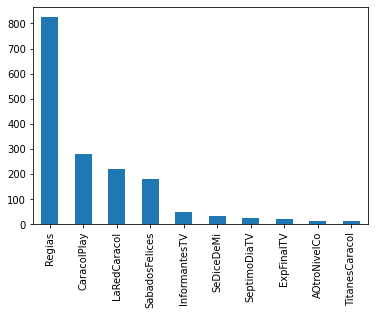

In [25]:
name_counts[0:10].plot.bar()

In [26]:
print(df.tweet[1])
print(df.mentions[1])

Vía @SabadosFelices | Uno de los Viejitos Sordos está molesto porque del asilo no les han dicho nada para celebrar el Día del Adulto Mayor, y por eso se reunió virtualmente con su amigo, pero como siempre, terminó un poco molesto porque no le entendía nada https://t.co/0ClSPWBNKB https://t.co/MYB5ja7tLs
['SabadosFelices']


In [27]:
import numpy as np
mentions=np.array([])
for m in df.mentions:
  mentions=np.append(mentions,m)
mentions

array(['[]', "['SabadosFelices']", '[]', ..., "['Regias']", "['Regias']",
       '[]'], dtype='<U64')

In [28]:
pd_count_mentions=pd.value_counts(mentions)

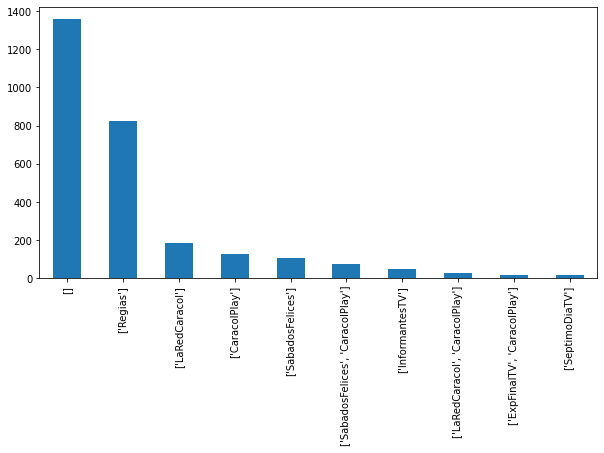

In [29]:
plt.figure(figsize=(10,5))
pd_count_mentions[:10].plot.bar()

In [31]:
count_mentions=np.unique(mentions, return_counts=True)
count_mentions

(array(["['AOtroNivelCo', 'ClaroMusicaCO']",
        "['AOtroNivelCo', 'DeezerLatino']",
        "['AOtroNivelCo', 'SpotifyColombia']", "['AOtroNivelCo']",
        "['AlejoPalacio']", "['Alkilados']",
        "['BluRadioCo', 'Octasasso', 'MonicaJllo']",
        "['BluRadioCo', 'elespectador']", "['BluRadioCo']",
        "['CLAUDIABAHAMON', 'MauYRicky']",
        "['CLAUDIABAHAMON', 'susoelpaspi']", "['CLAUDIABAHAMON']",
        "['CaracolPlay']", "['Cine_Colombia']", "['Compensar_info']",
        "['EndeavorCol']", "['Espitiamario']",
        "['ExpFinalTV', 'CaracolPlay']", "['ExpFinalTV', 'LaRedCaracol']",
        "['ExpFinalTV', 'SabadosFelices', 'CaracolPlay']",
        "['ExpFinalTV']", "['F_Santo_Domingo', 'ProfamiliaCol', 'pulzo']",
        "['F_Santo_Domingo', 'ProfamiliaCol']", "['ForosEspectador']",
        "['GolCaracol']", "['HJCKRadio']",
        "['InformantesTV', 'EliCortiles', 'almendo4']",
        "['InformantesTV', 'KikoBenitez']", "['InformantesTV']",
        "['Jorg

In [32]:
indexorder=np.argsort(-1*count_mentions[1])
fig = px.bar(x=count_mentions[0][indexorder], y=count_mentions[1][indexorder])
fig.show()

In [307]:
df['user'].value_counts()

Caracol Televisión    3000
Name: user, dtype: int64

## Uso de expresiones regulares para limpiar texto

Los textos siempre tienen ruido que nos impiden hacer un buen análisis del mismo. Por eso, lo primero que normalmente hacemos es una limpieza del texto eliminando de él todo aquello que no influye en entender de qué trata.

1.   Eliminamos las URL
2.   Eliminamos correos electrónicos
2.   Eliminamos hashtags
2.   Eliminamos menciones que se suelen hacer con @Nombre
2.   Eliminamos los números




In [37]:
import re

In [337]:
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[!#?,.:";‘’]',' ', elem))
  return df

In [234]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,"#Rubí | Sin importar las consecuencias, Alejandro está dispuesto a recuperar a Rubí, dañar su matrimonio podría ser el primer paso para lograr su objetivo. \n➡️ https://t.co/Bel3dAW9MO https://t.co/1ebwkjeOxb",Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[]
1,1,"Vía @SabadosFelices | Uno de los Viejitos Sordos está molesto porque del asilo no les han dicho nada para celebrar el Día del Adulto Mayor, y por eso se reunió virtualmente con su amigo, pero como siempre, terminó un poco molesto porque no le entendía nada https://t.co/0ClSPWBNKB https://t.co/MYB5ja7tLs",Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices']
2,2,#Actualidad | El actor les contó a sus seguidores que estaba celebrando un año más de vida y las reacciones se dispararon. https://t.co/rhXu4BKUR8,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[]
3,3,"#Rubí | Luego de este viaje, Alejandro tendrá que lidiar con sentimientos como la culpa por haber roto el corazón de Sonia y el desamor tras ser rechazado nuevamente por Rubí. \n➡️ https://t.co/fVP5la88BX https://t.co/tMQvMdlxIO",Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[]
4,4,"#ElCuerpoDelDeseo | Las apasionadas miradas entre Salvador y Valeria despiertan la curiosidad de Walter, ahora no descansará hasta descubrir qué es lo que sucede entre ellos dos. \n➡️ https://t.co/WKKLYCc4PG https://t.co/9OxfpT5SVO",Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[]


In [338]:
df_clean = clean_text(df, 'tweet')
df_clean.head(6)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_clean,lemmas
0,0,importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo,Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]","[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]","[importar, consecuencia, alejandro, disponer, recuperar, rubí, dañar, matrimoniar, poder, ser, ﻿1, pasar, lograr, objetivar]"
1,1,vía viejitos sordos molesto asilo dicho celebrar día adulto mayor reunió virtualmente amigo siempre terminó molesto entendía,Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]","[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]","[vía, viejitos, sordo, molestar, asilar, decir, celebrar, día, adulto, mayor, reunir, virtualmente, amigar, siempre, terminar, molestar, entender]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]","[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]","[actor, contar, seguidor, celebrar, año, vida, reaccionar, disparar]"
3,3,luego viaje alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí,Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]","[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]","[luego, viajar, alejandro, lidiar, sentimiento, culpar, haber, rotar, corazón, sonia, desamor, tras, ser, rechazar, nuevamente, rubí]"
4,4,apasionadas miradas salvador valeria despiertan curiosidad walter ahora descansará descubrir sucede dos,Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]","[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]","[apasionar, mirar, salvador, valeria, despertar, curiosidad, walter, ahora, descansar, descubrir, suceder, do]"
5,5,rt mariano siempre guía compañeros universidad recuerda puedes ver dos t…,Caracol Televisión,4084153,Colombia,0,1,2020-08-27 01:45:46,['LaNocturna'],['CaracolPlay'],"[rt, mariano, siempre, guía, compañeros, universidad, recuerda, puedes, ver, dos, t…]","[rt, mariano, siempre, guía, compañeros, universidad, recuerda, puedes, ver, dos]","[rt, mariano, siempre, guiar, compañero, universidad, recordar, poder, ver, do, t, …]"


## StopWords

La biblioteca Natural Language Toolkit (NLTK) tiene funciones para eliminar stopwords en diferentes idiomas.

In [239]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [285]:
df_clean['tweet'] = df_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_clean
0,0,importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo,Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, ,, alejandro, dispuesto, recuperar, rubí, ,, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo, .]","[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]"
1,1,vía viejitos sordos molesto asilo dicho celebrar día adulto mayor reunió virtualmente amigo siempre terminó molesto entendía,Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, ,, reunió, virtualmente, amigo, ,, siempre, ,, terminó, molesto, entendía]","[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon, .]","[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]"
3,3,luego viaje alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí,Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, ,, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí, .]","[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]"
4,4,apasionadas miradas salvador valeria despiertan curiosidad walter ahora descansará descubrir sucede dos,Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ,, ahora, descansará, descubrir, sucede, dos, .]","[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]"


Podemos extender el diccionario de stopwords

Eliminar signos de puntuación y caracteres extraños

## Eliminar emojis

In [74]:
!pip install emoji

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=ce479c90400274c42f60f557bf3c566f46648a575477a11a281ad00f9e6b702f
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [288]:
import emoji
def remove_emoji(text):
  return emoji.get_emoji_regexp().sub(r'', text)

In [287]:
df_clean['tweet'][5]

'rt mariano siempre guía compañeros universidad recuerda puedes ver dos t…'

In [88]:
remove_emoji(df_clean['tweet'][5])

'rt : mariano siempre guía compañeros universidad , recuerda puedes ver dos t…'

In [289]:
df_clean['tweet']=df_clean['tweet'].apply(lambda text: remove_emoji(text))

In [290]:
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_clean
0,0,importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo,Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, ,, alejandro, dispuesto, recuperar, rubí, ,, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo, .]","[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]"
1,1,vía viejitos sordos molesto asilo dicho celebrar día adulto mayor reunió virtualmente amigo siempre terminó molesto entendía,Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, ,, reunió, virtualmente, amigo, ,, siempre, ,, terminó, molesto, entendía]","[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon, .]","[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]"
3,3,luego viaje alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí,Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, ,, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí, .]","[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]"
4,4,apasionadas miradas salvador valeria despiertan curiosidad walter ahora descansará descubrir sucede dos,Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ,, ahora, descansará, descubrir, sucede, dos, .]","[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]"


In [252]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens
0,0,"importar consecuencias, alejandro dispuesto recuperar rubí, dañar matrimonio podría ser primer paso lograr objetivo.",Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, ,, alejandro, dispuesto, recuperar, rubí, ,, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo, .]"
1,1,"vía viejitos sordos molesto asilo dicho celebrar día adulto mayor, reunió virtualmente amigo, siempre, terminó molesto entendía",Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, ,, reunió, virtualmente, amigo, ,, siempre, ,, terminó, molesto, entendía]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon.,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon, .]"
3,3,"luego viaje, alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí.",Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, ,, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí, .]"
4,4,"apasionadas miradas salvador valeria despiertan curiosidad walter, ahora descansará descubrir sucede dos.",Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ,, ahora, descansará, descubrir, sucede, dos, .]"


In [291]:
df['tokens_clean']=df['tokens']

In [292]:
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

In [305]:
df_clean['user']

0       Caracol Televisión
1       Caracol Televisión
2       Caracol Televisión
3       Caracol Televisión
4       Caracol Televisión
               ...        
2995    Caracol Televisión
2996    Caracol Televisión
2997    Caracol Televisión
2998    Caracol Televisión
2999    Caracol Televisión
Name: user, Length: 3000, dtype: object

In [293]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_clean
0,0,importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo,Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, ,, alejandro, dispuesto, recuperar, rubí, ,, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo, .]","[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]"
1,1,vía viejitos sordos molesto asilo dicho celebrar día adulto mayor reunió virtualmente amigo siempre terminó molesto entendía,Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, ,, reunió, virtualmente, amigo, ,, siempre, ,, terminó, molesto, entendía]","[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon, .]","[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]"
3,3,luego viaje alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí,Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, ,, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí, .]","[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]"
4,4,apasionadas miradas salvador valeria despiertan curiosidad walter ahora descansará descubrir sucede dos,Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ,, ahora, descansará, descubrir, sucede, dos, .]","[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]"


# Tokenización

Es el proceso de dividir el texto en tokens (palabras, bigramas, secuencias...)

In [100]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [303]:
df_clean['tokens'] = df_clean['tweet'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_clean
0,0,importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo,Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]","[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]"
1,1,vía viejitos sordos molesto asilo dicho celebrar día adulto mayor reunió virtualmente amigo siempre terminó molesto entendía,Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]","[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]","[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]"
3,3,luego viaje alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí,Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]","[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]"
4,4,apasionadas miradas salvador valeria despiertan curiosidad walter ahora descansará descubrir sucede dos,Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]","[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]"


## Frecuencia de palabras
Después de quitar los stopwords, procemos a calcular la frecuencia de palablas

In [294]:
import itertools
import collections

In [296]:
all_words = list(itertools.chain(*df_clean['tokens']))

In [297]:
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('vía', 1309),
 ('capítulo', 276),
 ('’', 216),
 ('‘', 213),
 ('ídolo', 194),
 ('pues', 175),
 ('día', 172),
 ('seguidores', 171),
 ('vida', 168),
 ('actriz', 161),
 ('i', 149),
 ('mujer', 144),
 ('cuenta', 137),
 ('cantante', 135),
 ('ser', 134),
 ('gran', 132),
 ('artista', 128),
 ('mira', 124),
 ('cómo', 122),
 ('luego', 119),
 ('ponte', 115),
 ('actor', 114),
 ('años', 113),
 ('hombre', 110),
 ('además', 103),
 ('aquí', 102),
 ('joven', 99),
 ('ver', 98),
 ('embargo', 98),
 ('dos', 95),
 ('mejor', 95),
 ('así', 93),
 ('casa', 88),
 ('tras', 83),
 ('amor', 82)]

## Frecuencia de bigramas

In [192]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [327]:
text

'importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo'

In [335]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens]

In [336]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('ponte', 'día'), 114),
 (('mira', 'capítulo'), 107),
 (('día', 'capítulo'), 74),
 (('capítulo', 'completo'), 70),
 (('redes', 'sociales'), 59),
 (('vía', 'actriz'), 57),
 (('vía', 'i'), 47),
 (('p', 'm'), 46),
 (('‘', 'el'), 36),
 (('lunes', 'viernes'), 34),
 (('revive', 'capítulo'), 33),
 (('vía', 'artista'), 32),
 (('vía', 'seguidores'), 29),
 (('vía', 'cantante'), 27),
 (('vía', 'además'), 24)]

In [249]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [250]:
d = bigram_df.set_index('bigram').T.to_dict('records')

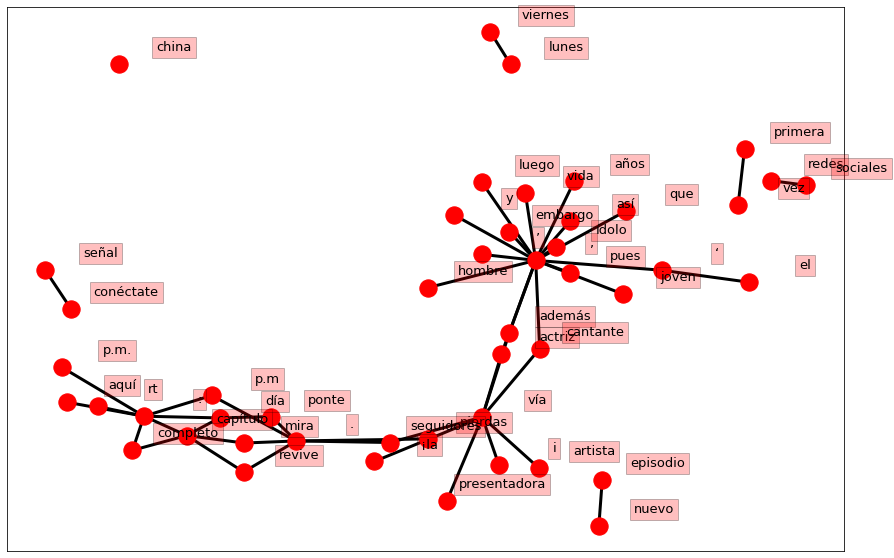

In [251]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0]+.135, value[1]+.045
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

# Lematización (Lemmatization)
Es la acción de identificar en el texto, dada una forma flexionada, el lema correspondiente. 

Se entiende como forma flexionada de una palabra, el plural, femenino, o conjugación de un verbo.

El lema es la forma que representa todas las formas flexionadas de una misma palabra. 

Por ejemplo, el lema de una conjugación de un verbo es el verbo en infinitivo. De un sustantivo en plural, es el sustantivo en singular y masculino.

In [108]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

     |████████████████████████████████| 16.2MB 667kB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172934 sha256=c0387cd8988a87aaeef05c022945d379aba026a3234e8a20bcba3574b0cfd593
  Stored in directory: /tmp/pip-ephem-wheel-cache-8zgc5d9h/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [278]:
import es_core_news_sm
nlp = es_core_news_sm.load()

La descripción de las diferentes abreviaturas la puede encontrar en: https://spacy.io/api/annotation#pos-tagging

In [323]:
print(df_clean.tweet[0])
d=nlp(df_clean.tweet[0])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo


[['importar', 'importar', 'VERB', ''],
 ['consecuencias', 'consecuencia', 'NOUN', ''],
 ['alejandro', 'alejandro', 'PROPN', 'PER'],
 ['dispuesto', 'disponer', 'ADJ', ''],
 ['recuperar', 'recuperar', 'VERB', ''],
 ['rubí', 'rubí', 'PROPN', ''],
 ['dañar', 'dañar', 'VERB', ''],
 ['matrimonio', 'matrimoniar', 'NOUN', ''],
 ['podría', 'poder', 'AUX', ''],
 ['ser', 'ser', 'AUX', ''],
 ['primer', '\ufeff1', 'ADJ', ''],
 ['paso', 'pasar', 'NOUN', ''],
 ['lograr', 'lograr', 'VERB', ''],
 ['objetivo', 'objetivar', 'NOUN', '']]

Por ejemplo, detectar los sustantivos en un texto

In [171]:
for noun in d.noun_chunks:
  print(noun.text)

consecuencias
alejandro dispuesto
rubí
matrimonio
paso
objetivo


In [324]:
df_clean['lemmas'] = df_clean.tweet.apply(lambda text: [tok.lemma_ for tok in nlp(text)])
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_clean,lemmas
0,0,importar consecuencias alejandro dispuesto recuperar rubí dañar matrimonio podría ser primer paso lograr objetivo,Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]","[importar, consecuencias, alejandro, dispuesto, recuperar, rubí, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo]","[importar, consecuencia, alejandro, disponer, recuperar, rubí, dañar, matrimoniar, poder, ser, ﻿1, pasar, lograr, objetivar]"
1,1,vía viejitos sordos molesto asilo dicho celebrar día adulto mayor reunió virtualmente amigo siempre terminó molesto entendía,Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]","[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, reunió, virtualmente, amigo, siempre, terminó, molesto, entendía]","[vía, viejitos, sordo, molestar, asilar, decir, celebrar, día, adulto, mayor, reunir, virtualmente, amigar, siempre, terminar, molestar, entender]"
2,2,actor contó seguidores celebrando año vida reacciones dispararon,Caracol Televisión,4084153,Colombia,6,1,2020-08-27 02:32:46,['Actualidad'],[],"[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]","[actor, contó, seguidores, celebrando, año, vida, reacciones, dispararon]","[actor, contar, seguidor, celebrar, año, vida, reaccionar, disparar]"
3,3,luego viaje alejandro lidiar sentimientos culpa haber roto corazón sonia desamor tras ser rechazado nuevamente rubí,Caracol Televisión,4084153,Colombia,0,0,2020-08-27 02:19:56,['Rubí'],[],"[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]","[luego, viaje, alejandro, lidiar, sentimientos, culpa, haber, roto, corazón, sonia, desamor, tras, ser, rechazado, nuevamente, rubí]","[luego, viajar, alejandro, lidiar, sentimiento, culpar, haber, rotar, corazón, sonia, desamor, tras, ser, rechazar, nuevamente, rubí]"
4,4,apasionadas miradas salvador valeria despiertan curiosidad walter ahora descansará descubrir sucede dos,Caracol Televisión,4084153,Colombia,3,0,2020-08-27 02:00:15,['ElCuerpoDelDeseo'],[],"[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]","[apasionadas, miradas, salvador, valeria, despiertan, curiosidad, walter, ahora, descansará, descubrir, sucede, dos]","[apasionar, mirar, salvador, valeria, despertar, curiosidad, walter, ahora, descansar, descubrir, suceder, do]"


In [356]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('vía', 1310),
 ('hacer', 350),
 ('capítulo', 289),
 ('contar', 263),
 ('ser', 240),
 ('poder', 239),
 ('día', 218),
 ('’', 216),
 ('‘', 213),
 ('ídolo', 196),
 ('mujer', 190),
 ('¡', 188),
 ('seguidor', 187),
 ('artista', 178),
 ('pues', 175)]

# Radicalización (Stemming)
Stremming es el proceso de llevar las palabras a su forma raíz.

Después de dividido el texto en palabras, pasamos a hacer el stemming. Para hacerlo en idioma español debemos usar la librería SnowballStemmer, que permite varios lenguajes además del inglés.

In [ ]:
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer ## Para poder hacerlo con idiomas diferentes al inglés

In [166]:
stemmer_spanish = SnowballStemmer("spanish")

In [ ]:
df_clean['tokens_stem'] = df_clean['tokens'].apply(lambda text: [s for s in [stemmer_spanish.stem(i) for i in text] if s.isalpha() and len(s) > 1])

In [168]:
df_clean.head(2)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tokens,tokens_stem,lemmas
0,0,"importar consecuencias, alejandro dispuesto recuperar rubí, dañar matrimonio podría ser primer paso lograr objetivo.",Caracol Televisión,4084153,Colombia,3,1,2020-08-27 03:07:25,['Rubí'],[],"[importar, consecuencias, ,, alejandro, dispuesto, recuperar, rubí, ,, dañar, matrimonio, podría, ser, primer, paso, lograr, objetivo, .]","[import, consecuent, alejandr, dispuest, recuper, rub, dañ, matrimoni, podr, ser, prim, pas, logr, objet]","[importar, consecuencia, ,, alejandro, disponer, recuperar, rubí, ,, dañar, matrimoniar, poder, ser, ﻿1, pasar, lograr, objetivar, .]"
1,1,"vía viejitos sordos molesto asilo dicho celebrar día adulto mayor, reunió virtualmente amigo, siempre, terminó molesto entendía",Caracol Televisión,4084153,Colombia,6,3,2020-08-27 02:50:00,[],['SabadosFelices'],"[vía, viejitos, sordos, molesto, asilo, dicho, celebrar, día, adulto, mayor, ,, reunió, virtualmente, amigo, ,, siempre, ,, terminó, molesto, entendía]","[via, viejit, sord, molest, asil, dich, celebr, dia, adult, mayor, reun, virtual, amig, siempr, termin, molest, entend]","[vía, viejitos, sordo, molestar, asilar, decir, celebrar, día, adulto, mayor, ,, reunir, virtualmente, amigar, ,, siempre, ,, terminar, molestar, entender]"
